# **Proyek Prediksi Analitik: [Diabetes]**

## **Import Library**

- Pandas: untuk manipulasi dan analisis data
- Numpy: untuk komputasi numerik
- Seaborn: untuk visualisasi data statistik
- Matplotlib: untuk visualisasi data
- Scikit-learn (sklearn): untuk machine learning

In [2]:
# Melakukan import library
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## **Loading Data**

Melakukan load dataset dari lokal menggunakan fungsi read_csv dari library pandas

In [3]:
# Membaca berkas CSV
diabetes_df = pd.read_csv("data/diabetes-dataset.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Insight:**
- Terdapat dataset kondisi fisiologis pada wanita yang digunakan untuk memprediksi apakah kondisi tersebut berisiko diabetes atau tidak
- Dalam dataset ini terdapat 9 kolom yaitu Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age dan Outcome (label/kelas)
- Untuk label pada dataset ini adalah binary yaitu 1 menandakan berisiko diabetes dan 0 non-diabetes


## **Exploratory Data Analysis (EDA)**

**Mendapatkan informasi dari dataset dengan fungsi info()**

In [4]:
# Mendapatkan informasi dari dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Insight:**
- Pada dataset ini terdiri dari 768 baris dan 9 kolom
- Tidak terlihat ada data yang hilang dalam dataset ini
- Untuk kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age dan Outcome memiliki tipe data int64
- Untuk kolom BMI dan DiabetesPedigreeFunction memiliki tipe data float64
- Keseluruhan dataset ini menggunakan memori sekitar 54.1 KB

**Melihat deskripsi statistik dari dataset menggunakan fungsi describe()**

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insight:**
- Semua kolom memiliki 768 data
- Pada kolom Pregancies, Glucose, BloodPressure, SkinThickness, Insulin dan BMI untuk nilai terendahnya adalah 0. Nilai 0 untuk kolom ini tidak logis untuk suatu kondisi fisiologis pada manusia dan perlu ditangani saat tahapan Data Preparation.

**Mengecek apakah ada nilai kosong dengan fungsi isna()**

In [6]:
# Mengecek apakah ada data yang kosong
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Insight:**

Menggunakan fungsi isna() untuk mengecek apakah dalam dataset terdapat nilai NaN atau missing value. Terlihat pada tabel di atas untuk semua kolom tidak terdapat missing value.

**Mengecek apakah ada data yang duplikat pada dataset dengan fungsi duplicated()**

In [7]:
# Menghitung jumlah duplikasi data
print("Jumlah duplikasi:", diabetes_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight:**

Menggunakan fungsi duplicated() untuk mengecek apakah ada data duplikasi dalam dataset. Terlihat output di atas hasilnya adalah 0, ini menandakan tidak ada data duplikasi.

**Mendapatkan kolom yang memiliki nilai 0**

In [8]:
# Mengambil kolom selain target
df_columns = diabetes_df.drop(columns=['Outcome', 'Pregnancies']).columns

# Membuat list untuk menampung kolom yang memiliki nilai 0
zero_columns = []

# Menghitung jumlah missing value
for col in df_columns:
    miss_val_count = (diabetes_df[col] == 0).sum()

    if miss_val_count != 0:
        zero_columns.append(col)
        print(f"{col}: {miss_val_count}")

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


**Insight:**

Melakukan penegcekan pada beberapa kolom fisiologis apakah ada nilai 0 pada dataset. Terlihat pada kolom Glucose terdapat 5 nilai 0, BloodPressure terdapat 35 nilai 0, SkinThickness terdapat 227 nilai 0, Insulin terdapat 374 nilai 0 dan BMI terdapat 11 nilai 0. Nilai 0 ini menandakan nilai yang tidak logis dan perlu ditangani dengan melakukan imputasi pada tahapaan Data Preparation.

**Mendapatkan nilai skew dengan fungsi skew() pada kolom numerik untuk mengetahui distribusi data**

In [9]:
# Menyimpan daftar kolom
df_columns = diabetes_df.columns

# Melakukan perulangan untuk menghitung nilai skewness tiap kolom
for col in df_columns:
    series = pd.Series(np.array(diabetes_df[col]))
    print(f"{col}: {series.skew()}")

Pregnancies: 0.9016739791518588
Glucose: 0.17375350179188992
BloodPressure: -1.8436079833551302
SkinThickness: 0.10937249648187608
Insulin: 2.272250858431574
BMI: -0.42898158845356543
DiabetesPedigreeFunction: 1.919911066307204
Age: 1.1295967011444805
Outcome: 0.635016643444986


**Melakukan ploting untuk melihat distribusi data dari kolom numerik apakah right-skewness, normal, atau left-skewness**

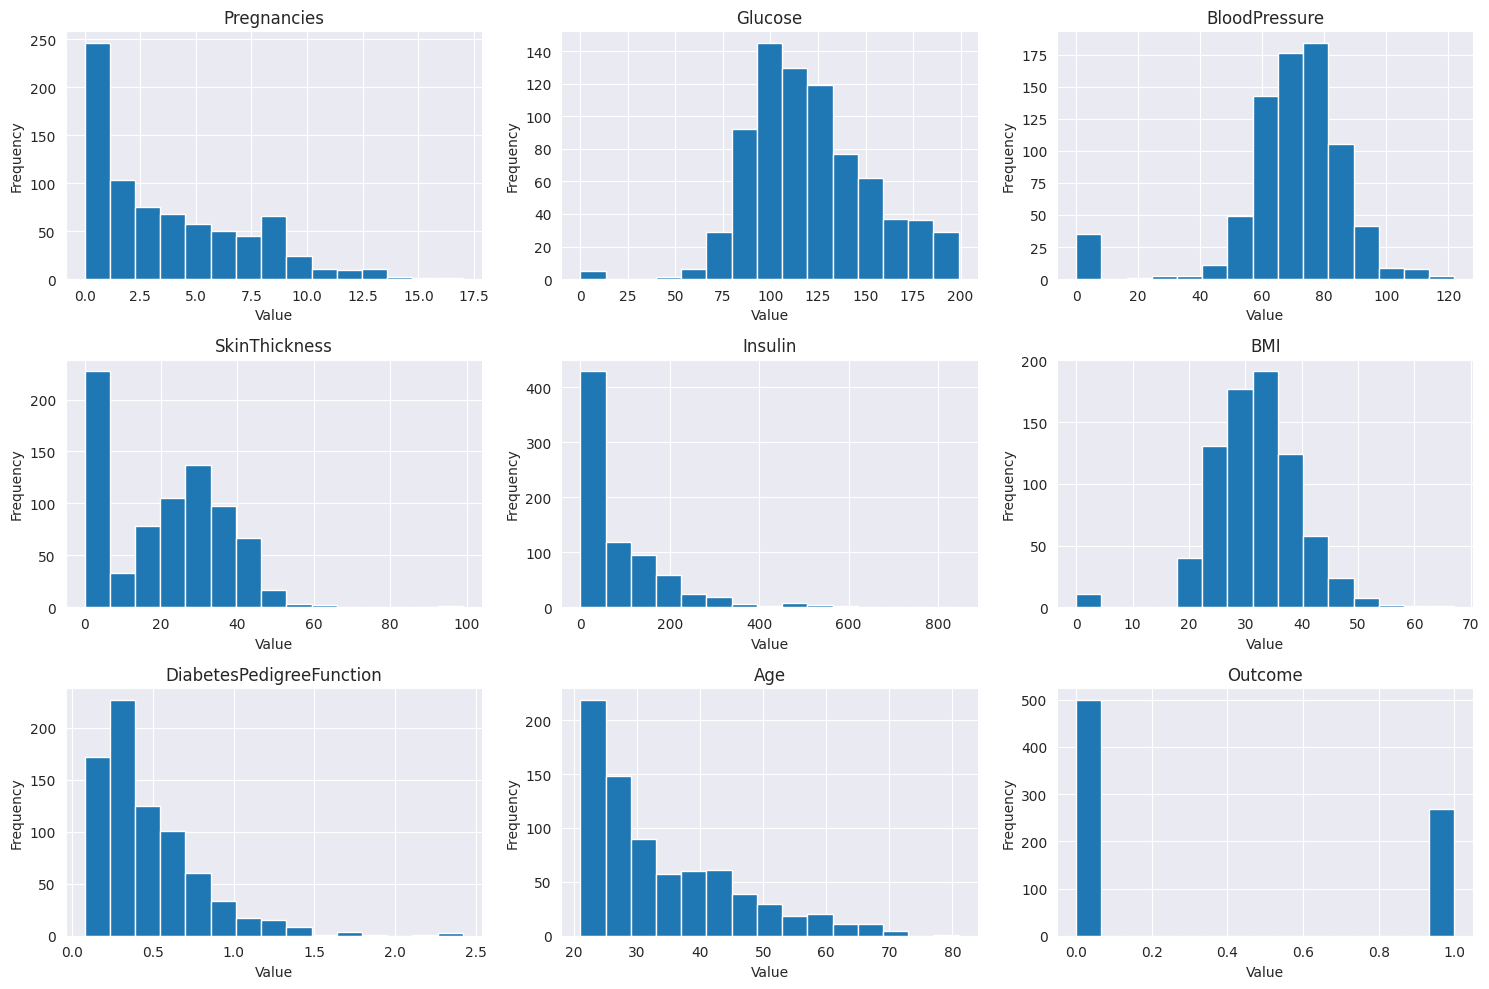

In [10]:
# Membuat subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Melakukan flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap kolom
for i, column in enumerate(diabetes_df.columns):
    diabetes_df[column].hist(ax=axes[i], bins=15)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

**Insight:**

Menggunakan fungsi skew() untuk mendapatkan nilai yang mewakili tingkat dan arah kecondongan dari distribusi data pada suatu kolom/fitur. Dari nilai ini dapat diketahui suatu fitur termasuk dalam right-skewness, normal atau left-skewness. Dari hasil skew() dan plot distribusi data di atas menunjukkan distribusi yang sangat bervariasi di setiap fitur, di mana Insulin, DiabetesPedigreeFunction, dan Age sangat condong ke kanan (positif), menandakan adanya outlier bernilai tinggi, sementara Pregnancies dan Outcome juga condong ke kanan pada tingkat yang lebih sedang. Sebaliknya, BloodPressure menunjukkan kemiringan yang sangat kuat ke kiri (negatif), yang disebabkan oleh adanya nilai-nilai rendah yang tidak wajar, sedangkan BMI hanya sedikit condong ke kiri. Di antara semua fitur, hanya Glucose dan SkinThickness yang memiliki distribusi data paling seimbang dan hampir simetris dengan nilai kemiringan yang mendekati nol.

**Melakukan ploting korelasi antar fitur dari hasil fungsi corr() dengan heatmap**

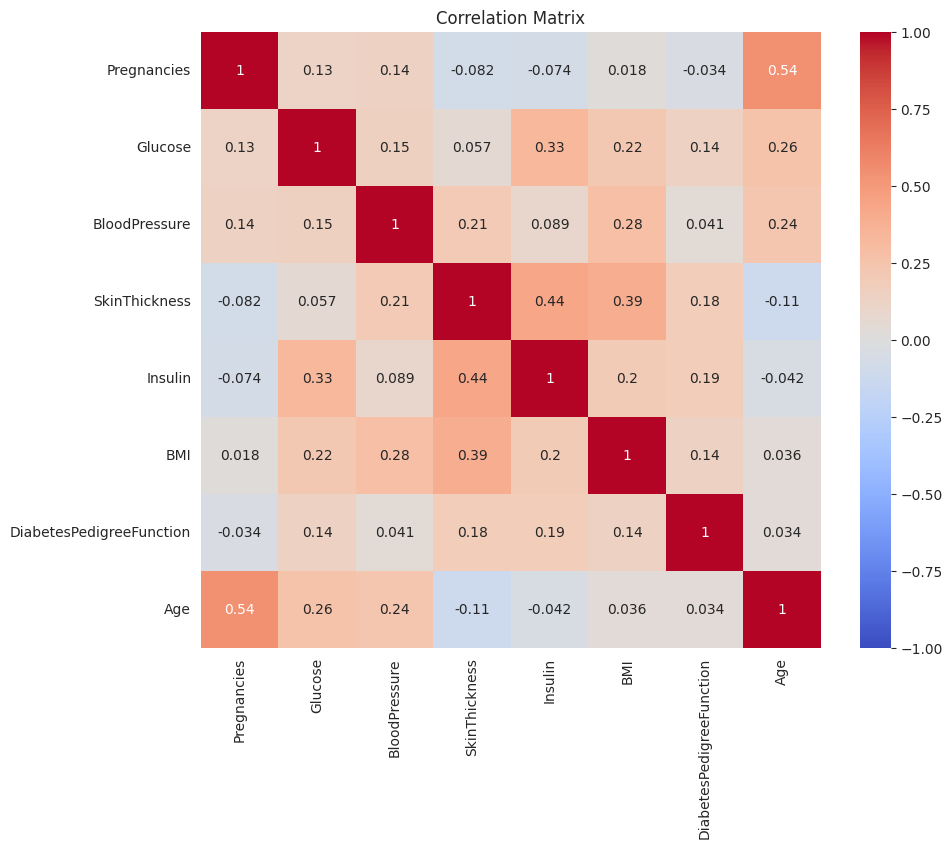

In [11]:
# Visualisasi korelasi antar variabel numerik
def show_corr_matrix(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr(numeric_only=True)

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()


show_corr_matrix(diabetes_df.drop(columns=['Outcome']))

In [12]:
# Menyimpan nama kolom yang memiliki korelasi yang cukup tinggi ( > 0.5)
high_corr_cols = ['Age', 'Pregnancies']

**Insight:**

Menggunakan fungsi corr() untuk mendapatkan nilai korelasi antar fitur. Dari heatmap di atas matriks korelasi ini menunjukkan bahwa sebagian besar variabel kesehatan dalam dataset memiliki hubungan positif yang lemah hingga sedang satu sama lain, artinya ketika satu nilai cenderung naik, nilai lainnya juga cenderung naik. Korelasi positif yang paling menonjol dan terkuat adalah antara Age (Usia) dan Pregnancies (Jumlah Kehamilan). Selain itu, hubungan yang cukup berarti juga terlihat antara SkinThickness (Ketebalan Kulit) dengan Insulin dan BMI. Di sisi lain, hampir tidak ada korelasi negatif yang kuat dalam data ini, karena semua hubungan negatif yang ada nilainya sangat kecil dan mendekati nol, menandakan tidak ada hubungan terbalik yang signifikan antar variabel. Dari hasil tersebut, untuk fitur Age dan Pregnancies disimpan dalam list untuk nanti saat tahap Data Preparation dilakukan reduksi dimensi/PCA.

**Menghitung jumlah kelas diabates dan non-diabates dan melakukan ploting**

In [13]:
# Menggunakan value_counts() untuk menghitung jumlah wanita yang berisiko diabetes dan tidak
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

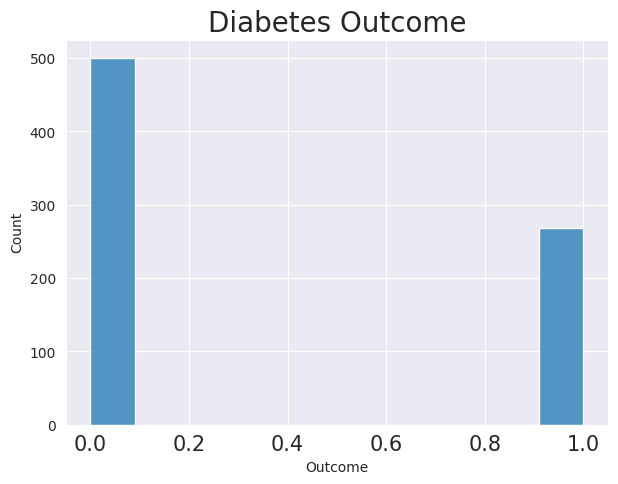

In [14]:
plt.figure(figsize=(7, 5))
sns.histplot(x="Outcome", data=diabetes_df)

plt.title("Diabetes Outcome", fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

**Insight:**

Menghitung jumlah kelas diabetes dan non-diabates dengan fungsi values_count(). Kelas diabetes memiliki jumlah 268 data dan non-diabetes 500 data. Terlihat dari grafik di atas bahwa kelas non-diabates lebih banyak dari kelas diabetes. Hal ini menandakan terjadinya imbalance kelas. Masalah ini perlu ditangani agar model tidak bias ke kelas mayoritas dan memiliki performa buruk pada kelas minoritas. Salah satunya dapat melakukan oversampling dengan teknik SMOTE.

**Mendapatkan jumlah kelas berdasarkan kategori rentang umur**

In [15]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang umur
def check_age(age):
    if age < 25:
        return "youth"
    elif 25 <= age < 37:
        return "maturity"
    elif 37 <= age < 49:
        return "middle-maturity"
    elif 49 <= age < 61:
        return "full-maturity"
    else:
        return "elderly"


# Membuat DataFrame baru age_df
age_df = diabetes_df.copy()

# Mengecek kategori umur berdasarkan rentang umur
age_df['Age'] = age_df['Age'].apply(check_age)

# Menghitung hasil diabetes berdasarkan kategori umur
age_df.groupby(by=['Age', 'Outcome'])['Outcome'].count()

Age              Outcome
elderly          0           20
                 1            7
full-maturity    0           28
                 1           39
maturity         0          185
                 1          110
middle-maturity  0           79
                 1           81
youth            0          188
                 1           31
Name: Outcome, dtype: int64

In [16]:
# Mengecek jumlah data berdasarkan kategori umur
age_df['Age'].value_counts()

Age
maturity           295
youth              219
middle-maturity    160
full-maturity       67
elderly             27
Name: count, dtype: int64

**Insight:**

- Membuat kategori berdasarkan rentang umur yaitu youth kurang dari 25 tahun, maturity dari 25 hingga 36 tahun, middle maturity dari 37 hingga 48 tahun, full maturity dari 49 hingga 60 tahun dan elderly lebih dari sama dengan 61 tahun.
- Dari dataset ini, sampel data paling banyak adalah wanita dewasa dengan umur dari rentang 25 hingga 36 tahun dengan jumlah 295 orang. Kemudian, diikuti youth sebanyak 219 orang, middle maturity 160 orang, full maturity 67 orang dan lansia 27 orang.

**Melakukan ploting untuk melihat jumlah wanita berdasarkan kategori umur**

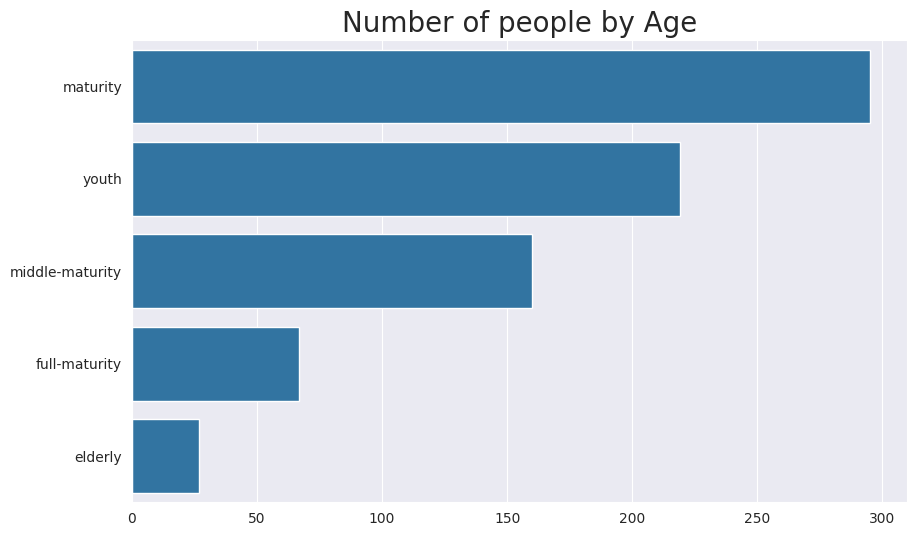

In [17]:
age_count = age_df['Age'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Age',
    data=age_count,
    errorbar=None,
)

plt.title("Number of people by Age", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**

Terlihat dari plot distribusi di atas, dataset ini banyak mengambil sampel kondisi fisiologis wanita yang sudah dewasa, diikuti dengan remaja, middle maturity, full maturity dan terakhir lansia/elderly.

**Melakukan ploting untuk melihat distribusi kelas berdasarkan kategori umur**

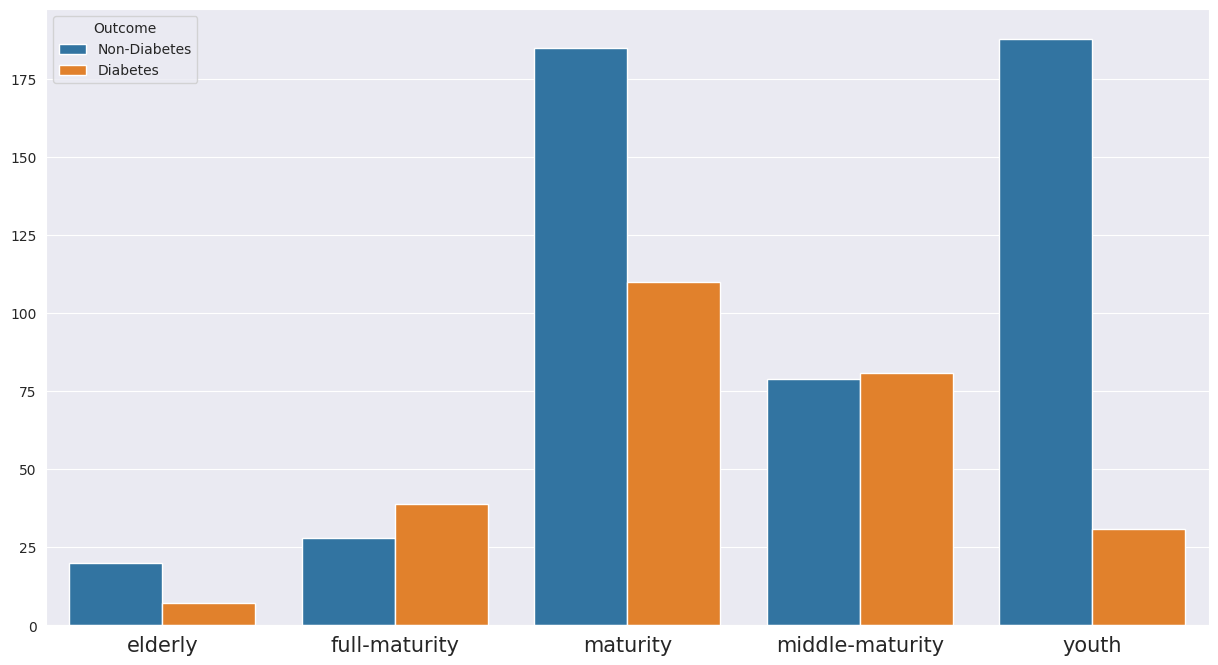

,Age,Outcome,Count
0,elderly,Non-Diabetes,20
1,elderly,Diabetes,7
2,full-maturity,Non-Diabetes,28
3,full-maturity,Diabetes,39
4,maturity,Non-Diabetes,185
5,maturity,Diabetes,110
6,middle-maturity,Non-Diabetes,79
7,middle-maturity,Diabetes,81
8,youth,Non-Diabetes,188
9,youth,Diabetes,31


In [18]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan umur
byage_df = age_df.groupby(by=['Age', 'Outcome']).size().reset_index(name='Count')
byage_df['Outcome'] = byage_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y="Count",
    x="Age",
    hue='Outcome',
    data=byage_df,
    errorbar=None,
)

plt.tick_params(axis='x', labelsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

byage_df

**Insight:**

- Pada lansia/elderly wanita yang berisiko diabates berjumlah 7 orang dan 20 orang tidak
- Pada full maturity wanita yang berisiko diabetes jumlahnya 39 orang dan 28 orang tidak
- Pada wanita dengan rentang usia dewasa/maturity, yang memiliki risiko diabetes berjumlah 110 orang dan 185 tidak
- Pada wanita yang menginjak usia middle maturity dan memiliki kondisi kesehatan yang berisiko diabates berjumlah 81 orang dan 79 tidak
- Pada wanita remaja yang berisiko diabates berjumlah 31 orang dan 188 tidak

**Mendapatkan jumlah wanita berdasarkan tingkat tekanan darah**

In [19]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang tekanan darah
def check_blood_pressure(blood_pressure):
    if blood_pressure < 80:
        return "normal"
    elif 80 <= blood_pressure <= 89:
        return "pre-hypertension"
    elif 90 <= blood_pressure <= 99:
        return "stage-1-hypertension"
    else:
        return "stage-2-hypertension"


blood_pressure_df = diabetes_df.copy()
blood_pressure_df['BloodPressure'] = blood_pressure_df['BloodPressure'].apply(check_blood_pressure)

blood_pressure_count = blood_pressure_df['BloodPressure'].value_counts()

blood_pressure_count

BloodPressure
normal                  563
pre-hypertension        145
stage-1-hypertension     44
stage-2-hypertension     16
Name: count, dtype: int64

**Insight:**

- Membuat kategori berdasarkan tingkat tekanan darah diastolik yaitu normal kurang dari 80 mmHg, prehypertension antara 80 hingga 89 mmHg, tahap 1 hipertensi dari 90 hingga 99 mmHg dan lebih dari 99 masuk ke hipertensi tahap 2.
- Dari dataset ini 563 wanita memiliki tekanan darah diastolik normal, 145 mengalami pre-hipertensi, 44 masuk ke tahap 1 hipertensi dan 16 orang tahap 2 hipertensi.

**Melakukan ploting jumlah wanita berdasarkan kondisi  tekanan darah**

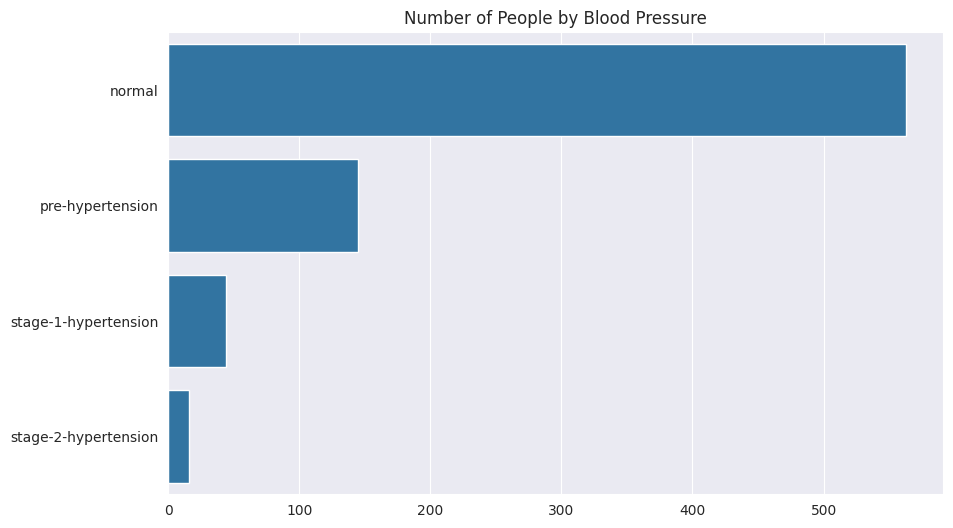

In [20]:
# Melihat distribusi jumlah wanita berdasarkan tekanan darah
blood_pressure_count = blood_pressure_df['BloodPressure'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.barplot(
    y='BloodPressure',
    x='Count',
    data=blood_pressure_count,
    errorbar=None
)

plt.title("Number of People by Blood Pressure", fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**

Dari plot distirbusi di atas, terlihat bahwa wanita dengan kondisi tekanan darah diastolik normal paling banyak diikuti dengan kondisi pre-hipertensi, hipertensi tahap 1 dan terakhir hipertensi tahap 2.

**Mendapatkan jumlah kelas berdasarkan kondisi tekanan darah dan melakukan ploting untuk melihat distribusi data**

In [21]:
# Menmpilkan hasil diabetes berdasarkan tekanan darah
blood_pressure_df.groupby(by=['BloodPressure', 'Outcome'])['Outcome'].count()

BloodPressure         Outcome
normal                0          385
                      1          178
pre-hypertension      0           84
                      1           61
stage-1-hypertension  0           24
                      1           20
stage-2-hypertension  0            7
                      1            9
Name: Outcome, dtype: int64

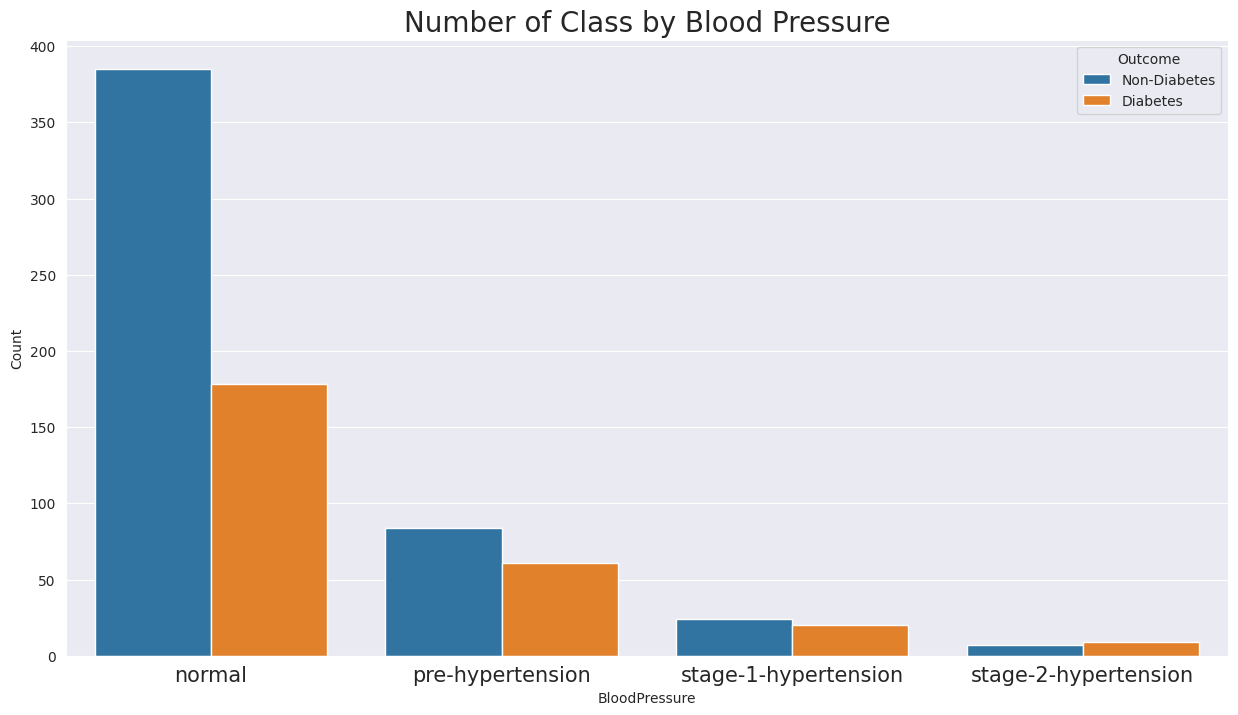

In [22]:
# Melihat distribusi penderita diabetes dan non-diabates berdasarkan tekanan darah
bybloodpressure_df = blood_pressure_df.groupby(by=['BloodPressure', 'Outcome']).size().reset_index(name='Count')
bybloodpressure_df['Outcome'] = bybloodpressure_df['Outcome'].map({0: 'Non-Diabetes', 1: 'Diabetes'})

plt.figure(figsize=(15, 8))

sns.barplot(
    y='Count',
    x='BloodPressure',
    hue='Outcome',
    data=bybloodpressure_df,
    errorbar=None
)

plt.title("Number of Class by Blood Pressure", fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

**Insight:**

- Wanita yang memmiliki kodnisi tekanan darah diastolik normal dan memiliki kondisi kesehatan yang berisiko diabetes berjumlah 178 orang dan 385 tidak
- Wanita yang mengalami pre-hipertensi dan memiliki kondisi yang berisiko diabetes jumlahnya 61 orang dan 84 tidak
- Wanita yang tekanan darahnya masuk ke tahap satu dan berisiko diabetes jumlahnya 20 orang dan 24 tidak
- Wanita yang tekanan darahnya masuk ke tahap dua dan berisiko diabetes jumlahnya 9 orang dan 7 tidak

**Mendapatkan jumlah wanita berdasarkan  BMI**

In [23]:
# Membuat fungsi untuk menentukan kategori berdasarkan BMI
def check_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi <= 24.9:
        return "normal"
    elif 25 <= bmi <= 29.9:
        return "overweight"
    else:
        return "obese"


bmi_df = diabetes_df.copy()
bmi_df['BMI'] = bmi_df["BMI"].apply(check_bmi)

bmi_df["BMI"].value_counts()

BMI
obese          472
overweight     179
normal         102
underweight     15
Name: count, dtype: int64

**Insight:**

- Membuat kategori berdasarkan nilai BMI yaitu wanita yang nilai BMI-nya kurang dari 18.5 masuk dalam kategori underweight. Kemudian, jika nilai BMI-nya dalam rentang 18.5 hingga 24.9 masuk dalam keadaan normal. Lalu, untuk BMI dengan rentang 25 hingga 29.9 menandakan overweight. Terakhir, jika nilai BMI melebihi 29.9 menandakan wanita tersebut mengalami obesitas.
- Dari dataset ini, wanita dengan kondisi obesitas memiliki sampel paling banyak yaitu 472 orang. Kemudian, diikuti kondisi overweght berjumlah 179 orang, normal 102 orang dan 15 orang mengalami underweight.

**Melakukan ploting untuk melihat distribusi jumlah wanita berdasarkan BMI**

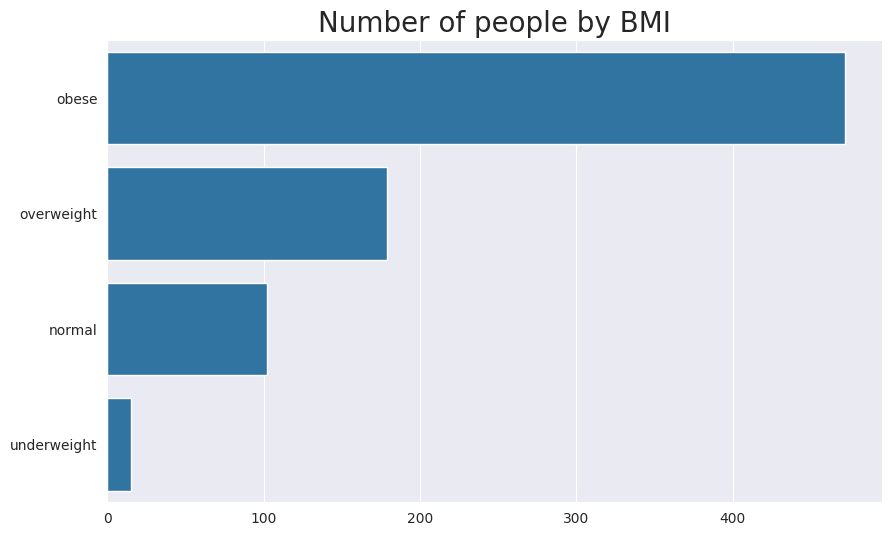

In [24]:
bmi_count = bmi_df['BMI'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.barplot(
    y='BMI',
    x='Count',
    data=bmi_count,
    errorbar=None,
)

plt.title("Number of people by BMI", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**

Terlihat dari hasil plot distribusi di atas, wanita dengan kondisi obesitas jumlahnya paling banyak, diikuti kondisi overweight, normal dan terakhir underweight.

**Mendapatkan jumlah kelas berdasarkan BMI dan melakukan ploting untuk melihat distribusi data**

In [25]:
# Menampilkan hasil diabetes berdasarkan BMI
bmi_df.groupby(by=['BMI', 'Outcome'])['Outcome'].count()

BMI          Outcome
normal       0           95
             1            7
obese        0          253
             1          219
overweight   0          139
             1           40
underweight  0           13
             1            2
Name: Outcome, dtype: int64

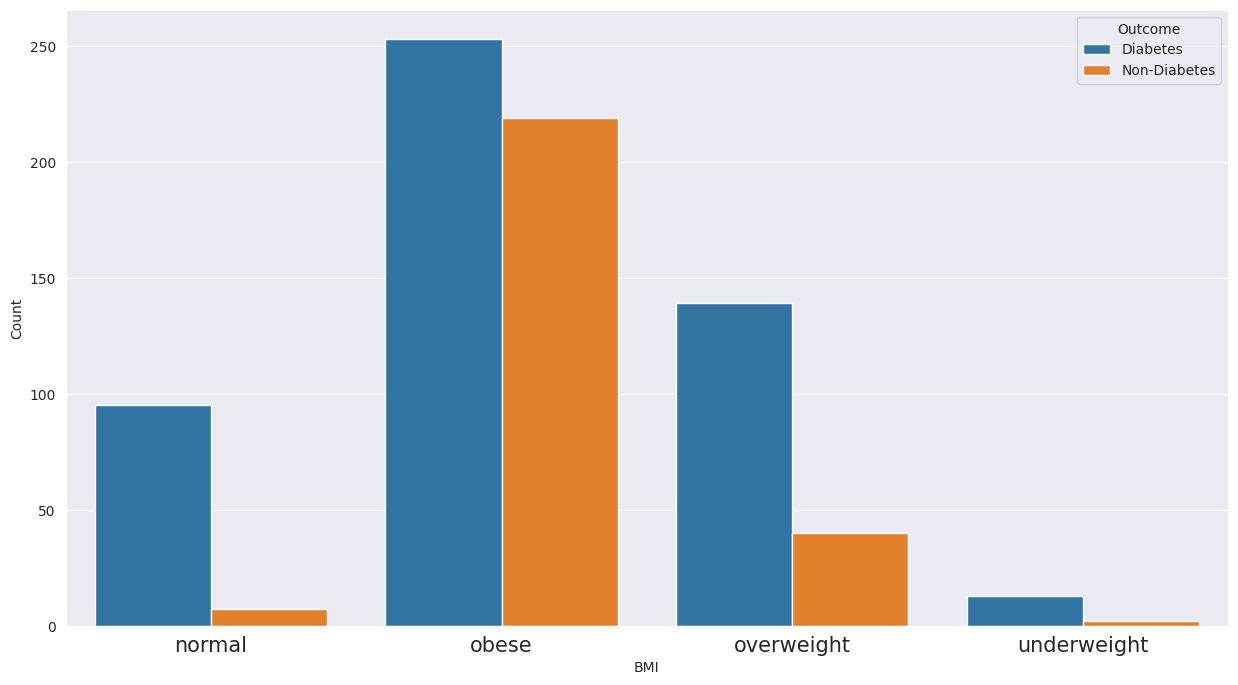

In [26]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan BMI
bybmi_df = bmi_df.groupby(by=['BMI', 'Outcome']).size().reset_index(name='Count')
bybmi_df['Outcome'] = bmi_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y='Count',
    x='BMI',
    hue='Outcome',
    data=bybmi_df,
    errorbar=None
)

plt.tick_params(axis='x', labelsize=15)
plt.show()

**Insight:**

- Wanita yang memiliki berat badan ideal/normal dan memiliki risiko diabetes jumlahnya 7 orang dan 95 tidak
- Wanita yang memiliki kondisi berat badanya obesitas dan memiliki risiko diabetes jumlahnya 219 orang dan 153 tidak
- Wanita dengan kondisi overweight dan berisiko diabetes jumlahnya 40 orang dan 139 tidak
- Waniata dengan kondisi kurus/underweight dan berisiko diabates jumlahnya 2 orang dan 13 tidak

**Melihat proporsi kelas diabates dan non-diabates menggunakan pie chart**

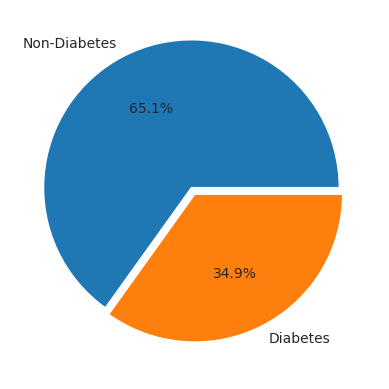

In [27]:
# Menghitung jumlah data berdasarkan hasil diabetes (0 dan 1)
outcome_count = diabetes_df['Outcome'].value_counts().tolist()

plt.pie(
    x=outcome_count,
    labels=('Non-Diabetes', 'Diabetes'),
    autopct='%1.1f%%',
    explode=(0.05, 0)
)

plt.show()

**Insight:**

Dari hasil pie chart di atas, dari 768 wanita 65.1% tidak mengalami diabates dan sisanya 34,9% mengalami diabetes

**Mengecek outlier pada fitur numerik**

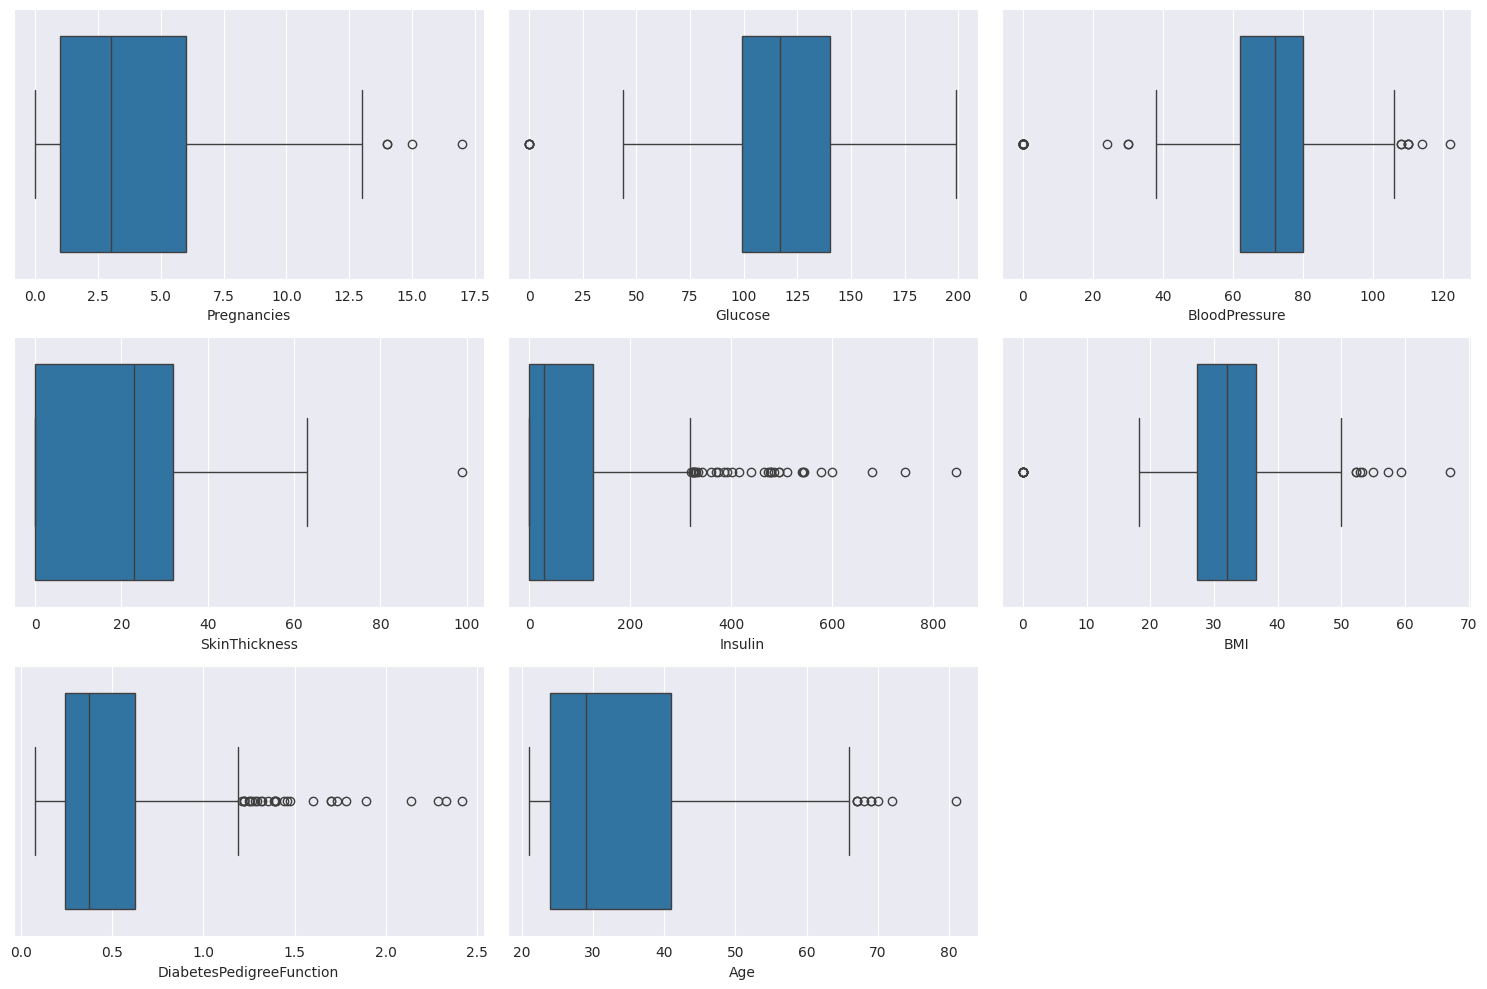

In [28]:
# Melihat distribusi pada data kuantitatif
df_columns = diabetes_df.drop(columns=['Outcome']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df_columns):
    sns.boxplot(x=diabetes_df[column], ax=axes[i])

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:**

Dari hasil box plot di atas, terlihat semua variabel independen memiliki data outlier. Mesikpun begitu, dikarenakan ini adalah kondisi kesehatan maka tidak dilakukan penanganan data outlier. Karena, ditakutkan akan menghilangkan banyak informasi.

## **Data Preparation**

### **Features Selection**

**Melakukan proses seleksi fitur menggunakan metode embedded**

In [29]:
# Memisahkan data mejadi fitur dan label
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Embedded Methods
# menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Mendapatkan fitur penting
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Meenentukan ambang batas untuk fitur penting
threshold = 0.05
important_features_indices = [i for i in range(len(importance)) if importance[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas > 0.05):\n")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X.columns[i]}: {importance[i]}")

# Mendapatkan nama kolom penting berdasarkan importace
important_features = X.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X[important_features]

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas > 0.05):

Pregnancies: 0.08501656218522641
Glucose: 0.2671417574733811
BloodPressure: 0.0886596828565411
SkinThickness: 0.06460412700022039
Insulin: 0.07154711634335888
BMI: 0.16876864301424507
DiabetesPedigreeFunction: 0.12269526460401114
Age: 0.13156684652301587

Dimensi data pelatihan dengan fitur penting: (768, 8)


**Insight:**

Pada tahapan data preparation, step pertama yang dilakukan adalah melakukan pemilihan fitur terbaik menggunakan metode embedded. Metode embedded adalah salah satu pendekatan seleksi fitur. Metode ini membuat model secara cerdas untuk memilih sendiri fitur-fitur yang paling berguna untuk tugas prediksinya. Ditetapkan treshold 0.05, jadi fitur yang nilainya lebih dari ambang batas tersebut akan dipilih. Terlihat dari hasil keluaran di atas, semua fitur yaitu Pregnancies, Glucose, BloddPressure, SkinThickness, BMI, Insulin, DiabetesPedigreeFunction dan Age memiliki nilai yang melebih ambang batas.

### **Spliting Data Training and Testing**

**Membagi dataset menjadi dua bagian yaitu data latih dan data uji dengan perbandingan 80:20**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42, stratify=y)

**Insight:**

Untuk step kedua dari Data Preparation adalah melakukan spliting data dengan fungsi train_split_test(). Hal ini perlu dilakukan agar saat melakukan imputasi dengan regresi, PCA, SMOTE tidak terjadi data leaked karena proses tersebut hanya dilakukan pada data latih. Strategi pembagian data ini adalah 80:20, artinya 80% digunakan sebagai data latih dan 20% sebagai data uji.

### **Imputation Data**

**Melakukan proses imputasi dengan teknik regresi**

In [31]:
# Membuat objek imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42, missing_values=0)

# Melakukan imputasi menggunakan data latih dan langsung diterapkan dengan transform
X_train_imputed = X_train.copy()
X_train_imputed[zero_columns] = imputer.fit_transform(X_train[zero_columns])

# Menerapkan imputasi pada data uji
X_test_imputed = X_test.copy()
X_test_imputed[zero_columns] = imputer.transform(X_test[zero_columns])

X_train_imputed

/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.00,43.00,27.2,0.580,24
711,5,126.0,78.0,27.00,22.00,29.6,0.439,40
373,2,105.0,58.0,40.00,94.00,34.9,0.225,25
46,1,146.0,56.0,28.21,170.04,29.7,0.564,29
682,0,95.0,64.0,39.00,105.00,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,28.92,138.81,28.9,0.542,23
113,4,76.0,62.0,30.63,55.12,34.0,0.391,25
556,1,97.0,70.0,40.00,118.23,38.1,0.218,30
667,10,111.0,70.0,27.00,123.77,27.5,0.141,40


**Insight:**

- Untuk step ketiga dari Data Preparation adalah melakukan imputasi dengan teknik regresi pada kolom yang memiliki nilai minimal 0 karena dataset ini berisi kondisi fisiologis dari manusia. Jadi untuk fitur Glucose, BloodPressure, SkinThickness, Insulin dan BMI yang memiliki nilai minimal 0 perlu ditangani karena ini kondisi tidak logis.

- Imputasi regresi adalah metode untuk mengisi nilai yang hilang (missing values) dengan cara memprediksi nilai tersebut berdasarkan hubungannya dengan fitur-fitur lain yang lengkap dalam dataset. Metode ini jauh lebih "cerdas" daripada imputasi sederhana (seperti mengisi dengan mean atau median) karena ia mempertahankan struktur dan korelasi antar variabel.


### **Standardization of Features**

**Melakukan scaling fitur menggunakan MinMaxScaler() untuk mengubah skala menjadi rentang 0 - 1**

In [32]:
# Standarisasi fitur numerik
scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train_imputed)
X_test_std = scaler.transform(X_test_imputed)

X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

**Insight:**

Untuk step selanjutnya pada tahap Data Preparation adalah melakukan scaling fitur menggunakan MinMaxScaler(). Scaling fitur adalah proses untuk menyamakan skala atau rentang nilai dari semua fitur numerik dalam sebuah dataset. MinMaxScaler adalah salah satu teknik spesifik untuk melakukan feature scaling. Cara kerjanya sangat sederhana: ia mengubah setiap nilai dalam sebuah fitur sehingga berada dalam rentang tertentu, biasanya antara 0 dan 1.

### **SMOTE Oversampling**

**Mengatasi kelas minoritas dengan melakukan Oversampling dengan metode SMOTE**

In [33]:
# Mengecek distribusi kelas target
Counter(y_train.map({0: "Non-Diabetes", 1: "Diabetes"}))

Counter({'Non-Diabetes': 400, 'Diabetes': 214})

In [34]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled.map({0: "Non-Diabetes", 1: "Diabetes"})))

# Mengubah hasil menjadi DataFrame untuk analisis lebih lanjut
y_train_resampled = pd.Series(y_train_resampled, name='Target')

X_train_resampled

Distribusi kelas setelah SMOTE: Counter({'Non-Diabetes': 400, 'Diabetes': 400})


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.237762,0.387755,0.054348,0.038409,0.184049,0.220935,0.050000
1,0.294118,0.489510,0.551020,0.217391,0.009602,0.233129,0.158129,0.316667
2,0.117647,0.342657,0.346939,0.358696,0.108368,0.341513,0.062806,0.066667
3,0.058824,0.629371,0.326531,0.230543,0.212675,0.235174,0.213808,0.133333
4,0.000000,0.272727,0.408163,0.347826,0.123457,0.539877,0.125612,0.016667
...,...,...,...,...,...,...,...,...
795,0.018647,0.442433,0.631653,0.448565,0.290576,0.589699,0.176107,0.166667
796,0.302493,0.929074,0.397993,0.282609,0.431783,0.269779,0.229977,0.139266
797,0.056290,0.488908,0.495427,0.151706,0.149392,0.194662,0.085528,0.239367
798,0.000000,0.453577,0.463401,0.236556,0.161360,0.296416,0.029190,0.044829


**Insight:**

- Untuk langkah selanjutnya melakukan oversampling dengan teknik SMOTE. Terlihat pada hasil di atas, kelas non-diabetes jumlahnya 400 dan kelas diabetes 214. Ini menandakan kondisi imbalance class. Masalah ini perlu dilakukan oversamppling agar performa model juga bagus saat memprediksi kelas minoritas dan tidak bias ke kelas mayoritas.
- Oversampling adalah proses untuk menangani masalah kelas tidak seimbang (imbalanced class), di mana jumlah data pada satu kelas (kelas mayoritas) jauh lebih banyak daripada kelas lainnya (kelas minoritas).
- SMOTE (Synthetic Minority Over-sampling Technique) adalah sebuah teknik cerdas untuk mengatasi masalah kelas tidak seimbang (imbalanced class) dengan cara memperbanyak data pada kelas minoritas. Berbeda dengan metode sederhana yang hanya menyalin data (yang bisa menyebabkan overfitting), SMOTE bekerja dengan menciptakan data baru yang sintetis (buatan).

### **Dimension Reduction**

**Melakukan reduksi dimensi pada kolom yang memiliki korelasi yang cukup tinggi**

In [35]:
# Inisialisasi PCA
pca = PCA(n_components=1, random_state=42)

# Melakukan PCA untuk data train pada kolom yang memiliki korelasi cukup tinggi
X_train_pca = pca.fit_transform(X_train_resampled[high_corr_cols])

# Menerapkan PCA untuk data latih
X_test_pca = pca.transform(X_test_std[high_corr_cols])

# Membuat dataframe baru untuk menyimpan hasil reduksi
df_train_pca = pd.DataFrame(data=X_train_pca, columns=['pca_1'])
df_test_pca = pd.DataFrame(data=X_test_pca, columns=['pca_1'])

X_train_final = pd.concat([
    X_train_resampled.drop(columns=high_corr_cols),
    df_train_pca
], axis=1)

X_test_final = pd.concat([
    X_test_std.drop(columns=high_corr_cols),
    df_test_pca
], axis=1)

X_train_final.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,pca_1
0,0.237762,0.387755,0.054348,0.038409,0.184049,0.220935,-0.237707
1,0.489510,0.551020,0.217391,0.009602,0.233129,0.158129,0.115737
2,0.342657,0.346939,0.358696,0.108368,0.341513,0.062806,-0.182943
3,0.629371,0.326531,0.230543,0.212675,0.235174,0.213808,-0.181713
4,0.272727,0.408163,0.347826,0.123457,0.539877,0.125612,-0.303670


**Insight:*

- Langkah selanjutnya pada Data Preparation adalah melakukan reduksi dimensi menggunakan PCA. Pada saat melakukan EDA ditemukan fitur Age dan Pregnancies memiliki nilai korlasi yang cukup tinggi. Hal ini dapat disebut dengan masalah multikolinearitas. Multikolinearitas adalah suatu kondisi di mana dua atau lebih variabel independen (fitur prediktor) memiliki korelasi yang sangat tinggi satu sama lain. Artinya, satu variabel prediktor dapat diprediksi dengan cukup akurat dari variabel prediktor lainnya.
- PCA adalah sebuah teknik reduksi dimensi. Tujuannya adalah untuk mengubah satu set fitur yang mungkin saling berkorelasi menjadi satu set fitur baru yang lebih kecil dan tidak saling berkorelasi. Fitur-fitur baru ini disebut Principal Components (PC) atau Komponen Utama.
- Pada tahap ini, fitur Age dan Pregnancies diterapkan teknik PCA dan menjadi satu fitur independe dengan nama pca_1


## **Building Model**

**Membangun model prediksi diabetes dengan tiga algoritma yaitu Random Forest, K-Nearest-Neighbors dan Logistic Regression**

In [36]:
# Pelatihan model
random_forest = RandomForestClassifier(random_state=42).fit(X_train_final, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_final, y_train_resampled)
lr = LogisticRegression(random_state=42).fit(X_train_final, y_train_resampled)

print("Training model selesai")

Training model selesai


**Insight:**

- Tahapan kode ini adalah pelatihan (training) tiga model klasifikasi machine learning yang berbeda menggunakan data yang sama.
- Tiga algoritma klasifikasi yang berbeda dipilih:
    - RandomForestClassifier: Sebuah model ensemble yang kuat berbasis pohon keputusan.
    - KNeighborsClassifier (KNN): Sebuah model berbasis jarak yang mengklasifikasikan data berdasarkan "tetangga" terdekatnya.
    - LogisticRegression: Sebuah model linear klasik untuk masalah klasifikasi biner.
- Setiap model yang telah dilatih disimpan ke dalam variabelnya masing-masing (random_forest, knn, lr) untuk digunakan pada tahap selanjutnya, yaitu evaluasi dan prediksi.

## **Evaluation Model**

**Melakukan evaluasi model dengan confusion matrix dan melihat performa model berdasarkan metrik akurasi, precision, recall dan f1-score**

In [37]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    evaluate_results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    return evaluate_results


# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest': evaluate_model(random_forest, X_test_final, y_test),
    'KNN': evaluate_model(knn, X_test_final, y_test),
    'LR': evaluate_model(lr, X_test_final, y_test)
}


def print_evaluate_model(result_list):
    # Memuat dataframe untuk meringkas hasil
    summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Mengisi dataframe dengan hasil
    rows = []
    for model_name, metrics in result_list.items():
        rows.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score']
        })

    # Mengkonversi daftar kamus menjadi dataframe
    summary_df = pd.DataFrame(rows)

    # Menampilkan dataframe
    print(summary_df)

**Insight:**

Kode ini bertujuan untuk mengevaluasi dan membandingkan performa dari tiga model machine learning (Random Forest, KNN, dan Logistic Regression) yang telah dilatih sebelumnya.

Prosesnya dibagi menjadi tiga bagian utama:

- Fungsi evaluate_model:

Ini adalah fungsi pembantu yang bertugas untuk menguji satu model. Ia mengambil model yang sudah dilatih, lalu menggunakannya untuk membuat prediksi pada data uji (X_test_final). Setelah itu, ia menghitung berbagai metrik performa penting—seperti Accuracy, Precision, Recall, F1 Score, dan Confusion Matrix—dengan membandingkan prediksi model dengan jawaban yang sebenarnya (y_test). Hasilnya dikembalikan dalam bentuk kamus (dictionary).

- Variabel results:

Di bagian ini, fungsi evaluate_model dipanggil untuk setiap model (random_forest, knn, lr).
Hasil evaluasi dari ketiga model tersebut dikumpulkan dan disimpan dalam satu variabel kamus bernama results agar terorganisir.

- Fungsi print_evaluate_model:

Fungsi ini bertugas untuk menyajikan hasil evaluasi agar mudah dibaca.
Ia mengambil data dari kamus results, mengubahnya menjadi sebuah tabel (DataFrame pandas), lalu mencetak tabel ringkasan tersebut ke layar.

- Dari keluaran di atas

In [38]:
print_evaluate_model(results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.714286   0.586207  0.629630  0.607143
1            KNN  0.759740   0.634921  0.740741  0.683761
2             LR  0.714286   0.578125  0.685185  0.627119


**Insight:**

1. KNN (K-Nearest Neighbors):

Model ini adalah performer terbaik dalam pengujian ini. Ia memiliki skor tertinggi untuk Accuracy (76.0%), Precision (63.5%), Recall (74.1%), dan F1 Score (68.4%). Ini menunjukkan bahwa KNN tidak hanya paling akurat secara keseluruhan, tetapi juga memiliki keseimbangan terbaik dalam menemukan kasus positif (Recall) dan memastikan tebakan positifnya benar (Precision).

2. Logistic Regression (LR):

Model ini menempati posisi kedua. Meskipun akurasinya setara dengan Random Forest (71.4%), ia memiliki Recall yang lebih baik (68.5%), yang berarti ia lebih unggul dalam mengidentifikasi kasus positif yang sebenarnya. F1 Score-nya (62.7%) yang lebih tinggi dari Random Forest mengonfirmasi bahwa ia memiliki keseimbangan presisi-recall yang lebih baik.

3. Random Forest:

Dalam pengujian ini, Random Forest menunjukkan kinerja terendah. Walaupun skornya tidak jauh berbeda dari Logistic Regression, Precision (58.6%) dan Recall (63.0%) yang lebih rendah membuatnya kurang efektif dibandingkan dua model lainnya, yang tercermin dari F1 Score-nya yang paling rendah (60.7%).

**Membuat fungsi untuk melakukan ploting confusion matrix**

In [39]:
# Membuat fungsi untuk melakukan ploting hasil evaluasi confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

**Insight:**

Fungsi ini bertujuan untuk membuat dan menampilkan visualisasi dari sebuah confusion matrix agar mudah dibaca dan diinterpretasikan.

**Menampilkan confusion matrix pada model Random Forest sebelum dilakukan hyperparameter tuning**

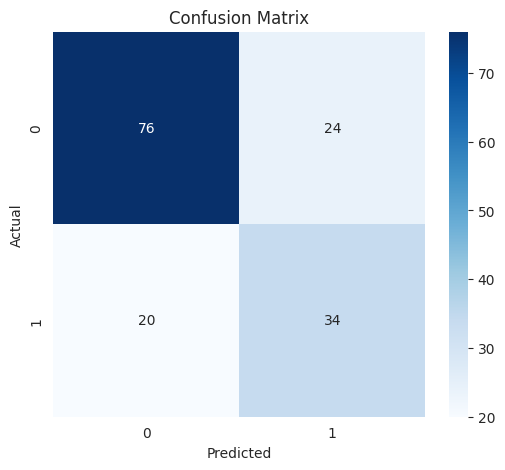

In [40]:
# Plot hasil model Random Forest
plot_confusion_matrix(results['Random Forest']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model Random Forest sebelum dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 76 --> Model berhasil menebak 76 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 34 --> Model berhasil menebak 34 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 20 -->  Model salah menebak 20 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 24 --> Model salah menebak 24 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.

**Menampilkan confusion matrix pada model K-Nearest-Neighbors sebelum dilakukan hyperparameter tuning**

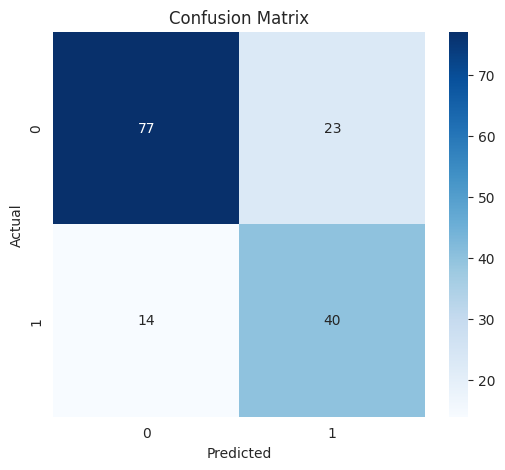

In [41]:
# Plot hasil model Ada Boost
plot_confusion_matrix(results['KNN']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model KNN sebelum dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 77  --> Model berhasil menebak 77 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 40 --> Model berhasil menebak 40 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 14 -->  Model salah menebak 14 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 23 --> Model salah menebak 23 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.

**Menampilkan confusion matrix pada model Logistic Regression sebelum dilakukan hyperparameter tuning**

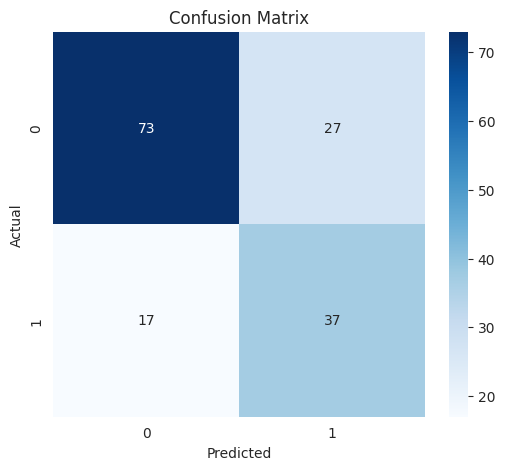

In [42]:
plot_confusion_matrix(results['LR']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model Logistic Regression sebelum dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 73 --> Model berhasil menebak 73 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 37 --> Model berhasil menebak 37 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 17 -->  Model salah menebak 17 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 27 --> Model salah menebak 27 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.

## **Tuning Model**

**Melakukan hyperparameter tuning menggunakan GridSearchCV pada model Random Forest**

In [43]:
# Definisikan parameter grid untuk Grid Search (Random Forest)
param_grid_rf = {
    'n_estimators': [10, 50, 100, 300],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1)
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, n_jobs=1, verbose=2)
grid_search_rf.fit(X_train_final, y_train_resampled)

# Output hasil terbaik
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_grid = grid_search_rf.best_estimator_

# Evaluasi performa model pada test set
grid_search_rf_score = best_rf_grid.score(X_test_final, y_test)
print((f"Accuracy RF after Grid Search: {grid_search_rf_score}"))

# Menyimpan hasil tuning
n_estimators = grid_search_rf.best_params_['n_estimators']
max_depth = grid_search_rf.best_params_['max_depth']
min_samples_split = grid_search_rf.best_params_['min_samples_split']

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=1, min_samples_split=2, n

**Insight:**

- Kode ini bertujuan untuk melakukan optimasi atau tuning hyperparameter untuk model Random Forest menggunakan metode Grid Search. Secara sederhana, proses ini seperti mencari setelan terbaik untuk sebuah mesin agar kinerjanya maksimal.

- Dari keluaran di atas didapatkan parameter terbaik sebagai berikut:
    - max_depth: 8
    - min_samples_split: 3
    - n_estimators: 100


**Melakukan hyperparameter tuning menggunakan GridSearchCV pada model K-Nearest-Neighbors**

In [44]:
# Definisikan parameter grid untuk Grid Search
param_grid_knn = {
    'n_neighbors': np.arange(5, 20, 1),
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=1, verbose=2)
grid_search_knn.fit(X_train_final, y_train_resampled)

# Output hasil terbaik
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
best_knn_grid = grid_search_knn.best_estimator_

# Evaluasi performa model pada test set
grid_search_knn_score = best_knn_grid.score(X_test_final, y_test)
print((f"Accuracy KNN after Grid Search: {grid_search_knn_score}"))

# Menyimpan hasil tuning
n_neighbors = grid_search_knn.best_params_['n_neighbors']
metric = grid_search_knn.best_params_['metric']

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=minkowski, 

**Insight:**

- Kode ini bertujuan untuk melakukan optimasi atau tuning hyperparameter untuk model KNN menggunakan metode Grid Search. Secara sederhana, proses ini seperti mencari setelan terbaik untuk sebuah mesin agar kinerjanya maksimal.

- Dari keluaran di atas didapatkan parameter terbaik sebagai berikut:
    - metric: minkowski
    - neighbors: 6


**Melakukan hyperparameter tuning menggunakan GridSearchCV pada model Logistic Regression**

In [45]:
# Definisikan parameter grid untuk Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=1, verbose=2)
grid_search_lr.fit(X_train_final, y_train_resampled)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search_lr.best_params_}")
best_lr_grid = grid_search_lr.best_estimator_

# Evaluasi performa model pada test set
grid_search_score_lr = best_lr_grid.score(X_test_final, y_test)
print(f"Accuracy LR after Grid Search: {grid_search_score_lr:.2f}")

# Menyimpan hyperparameter terbaik di vairabel
best_c_lr = grid_search_lr.best_params_['C']
best_penalty = grid_search_lr.best_params_['penalty']
best_solver = grid_search_lr.best_params_['solver']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2

/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/refanzzzz/miniconda3/envs/diabetes-predictive-analytic/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^

**Insight:**

- Kode ini bertujuan untuk melakukan optimasi atau tuning hyperparameter untuk model Logistic Regression menggunakan metode Grid Search. Secara sederhana, proses ini seperti mencari setelan terbaik untuk sebuah mesin agar kinerjanya maksimal.

- Dari keluaran di atas didapatkan parameter terbaik sebagai berikut:
    - C: 10
    - penalty: l2
    - solver: liblinear

## **Evaluasi Model Klasifikasi setelah Tuning**

**Setelah melakukan hyperparameter tuning, nilai dari best parameter diujikan ke pada ketiga model untuk melihat bagaimana performanya**

In [46]:
# Inisialisasi model klasifikasi setelah dilakukan tuning
rf_tuning = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                                   random_state=42).fit(X_train_final, y_train_resampled)
knn_tuning = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric).fit(X_train_final, y_train_resampled)
lr_tuning = LogisticRegression(C=best_c_lr, penalty=best_penalty, solver=best_solver, random_state=42).fit(
    X_train_final, y_train_resampled)

# Evaluasi ulang model
results_after_tuning = {
    'Random Forest': evaluate_model(rf_tuning, X_test_final, y_test),
    'KNN': evaluate_model(knn_tuning, X_test_final, y_test),
    'LR': evaluate_model(lr_tuning, X_test_final, y_test)
}

**Insight:**

Kode ini bertujuan untuk membuat versi final dari setiap model menggunakan setelan terbaik hasil tuning, lalu mengevaluasi ulang performa model-model yang sudah dioptimalkan tersebut.

In [47]:
# Menampilkan hasil evaluasi setelah tuning
print_evaluate_model(results_after_tuning)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.720779   0.579710  0.740741  0.650407
1            KNN  0.746753   0.636364  0.648148  0.642202
2             LR  0.714286   0.583333  0.648148  0.614035


**Insight:**

1. Random Forest

Model ini memiliki F1 Score tertinggi (0.650), yang menunjukkan keseimbangan terbaik antara Precision dan Recall.
Ia juga memiliki Recall tertinggi (0.741), artinya model ini adalah yang paling andal dalam menemukan semua kasus positif yang sebenarnya.
Kelemahannya adalah Precision terendah (0.580), yang berarti tebakan positifnya paling tidak akurat dibandingkan model lain.

2. KNN (K-Nearest Neighbors)

Model ini unggul dalam Akurasi (74.7%) dan Precision (63.6%). Artinya, ia memiliki tingkat kebenaran prediksi tertinggi secara umum, dan tebakan positifnya adalah yang paling bisa diandalkan.
Kelemahannya adalah Recall terendah (64.8%), yang berarti model ini paling banyak melewatkan kasus positif yang sebenarnya.

3. Logistic Regression (LR)

Model ini menunjukkan performa terendah di antara ketiganya pada hampir semua metrik, terutama pada F1 Score (0.614).

Berdasarkan hasil ini, Random Forest adalah model dengan performa terbaik secara keseluruhan dengan F1-score menjadi acuan utama, meskipun KNN memiliki akurasi tertinggi.


**Menampilkan confusion matrix pada model Random Forest setelah dilakukan hyperparameter tuning**

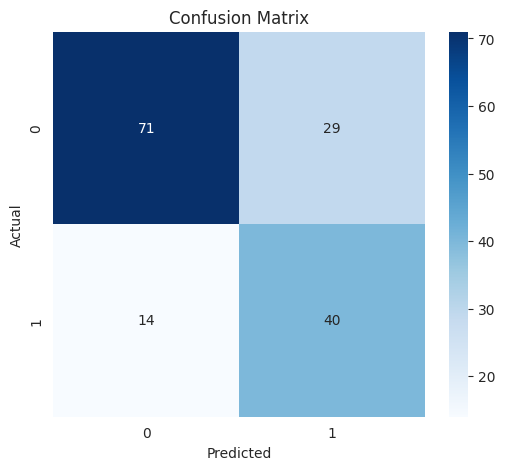

In [48]:
plot_confusion_matrix(results_after_tuning['Random Forest']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model Random Forest setelah dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 71  --> Model berhasil menebak 71 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 40 --> Model berhasil menebak 40 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 13 -->  Model salah menebak 14 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 29 --> Model salah menebak 29 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.

**Menampilkan confusion matrix pada model K-Nearest-Neighbors setelah dilakukan hyperparameter tuning**

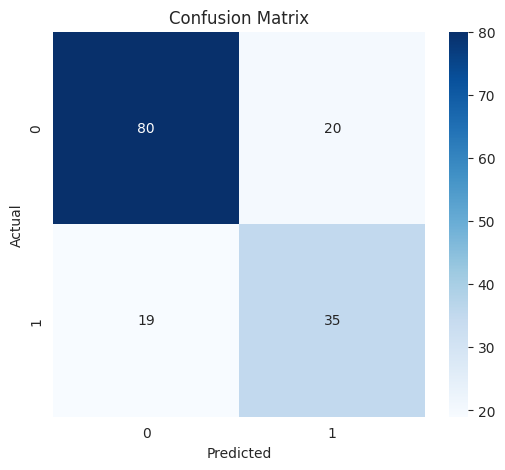

In [49]:
plot_confusion_matrix(results_after_tuning['KNN']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model KNN setelah dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 80  --> Model berhasil menebak 80 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 37 --> Model berhasil menebak 37 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 17 -->  Model salah menebak 17 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 27 --> Model salah menebak 27 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.

**Menampilkan confusion matrix pada model Logistic Regression setelah dilakukan hyperparameter tuning**

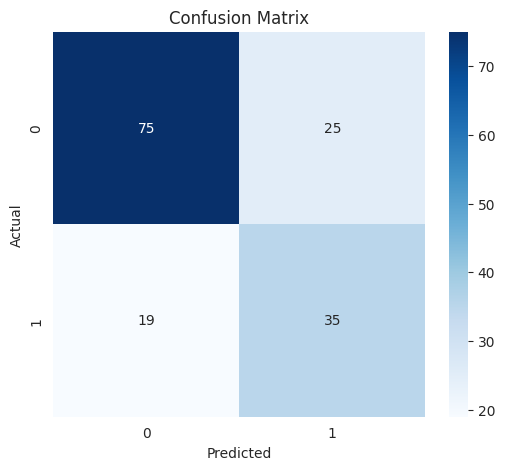

In [50]:
plot_confusion_matrix(results_after_tuning['LR']['Confusion Matrix'])

**Insight:**

Pada heatmap di atas adalah hasil confusion matrix pada model Logistic Regression setelah dilakukan hyperparameter tuning. Berikut ini adalah ringkasan dari hasil confusion matrix di atas.

True Positive (TP): 75  --> Model berhasil menebak 75 kasus sebagai "Diabetes" dengan benar.
True Negative (TN): 35 --> Model berhasil menebak 35 kasus sebagai "Non-Diabetes" dengan benar.
False Positive (FP): 19 -->  Model salah menebak 19 kasus sebagai "Diabetes", padahal sebenarnya kasus tersebut "Non-Diabetes". Ini disebut juga Error Tipe I.
False Negative (FN): 25 --> Model salah menebak 25 kasus sebagai "Non-Diabetes", padahal sebenarnya kasus tersebut "Diabetes". Ini disebut juga Error Tipe II.